## Capstone

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import numpy as np

# Lectura de datos

In [2]:
ventas_df = pd.read_excel('Base de Datos Bodega.xlsx', sheet_name='VENTAS')
proyeccion_df = pd.read_excel('Base de Datos Bodega.xlsx', sheet_name='PROY 10 AÑOS')
bodegas_df = pd.read_excel('Base de Datos Bodega.xlsx', sheet_name='BODEGAS')
comunas_df = pd.read_excel('Base de Datos Bodega.xlsx', sheet_name='COMUNAS')

### Limpieza y Preprocesamiento

In [3]:
## Limpieza
# Eliminar filas con valores faltantes
ventas_df.dropna(inplace=True)

# Limpieza y preprocesamiento de la hoja 'PROY 10 AÑOS'
# Eliminar filas con valores faltantes
proyeccion_df.dropna(inplace=True)

### Análisis de Ventas y Proyecciones a 10 años por Bodega (Cantidades vendidas por Bodega)

In [4]:
ventas_agrupadas = ventas_df.groupby('ID Bodega Despacho')['Cantidad'].sum()
proy_10_anos_agrupadas = proyeccion_df.groupby('ID Bodega Despacho')['Proyeccion 10 años'].sum()

print('-'*100)
print(f'Cantidades vendidas por bodega HOY')
print(ventas_agrupadas)

print('-'*100)
print(f'Cantidades vendidas por bodegas en los PROXIMOS 10 AÑOS:')
print(proy_10_anos_agrupadas)

----------------------------------------------------------------------------------------------------
Cantidades vendidas por bodega HOY
ID Bodega Despacho
1     1.172112e+06
2     4.897608e+05
3     3.099986e+05
4     4.896189e+05
5     5.609508e+05
6     7.424203e+05
7     5.790037e+05
8     1.069308e+06
9     2.047032e+05
10    5.710755e+05
Name: Cantidad, dtype: float64
----------------------------------------------------------------------------------------------------
Cantidades vendidas por bodegas en los PROXIMOS 10 AÑOS:
ID Bodega Despacho
1     715591.018768
2     309332.306336
3     172644.156722
4     485242.258465
5     628082.243891
6     677239.364730
7     456102.734142
8     880368.695705
9     126379.967005
10    324772.019255
Name: Proyeccion 10 años, dtype: float64


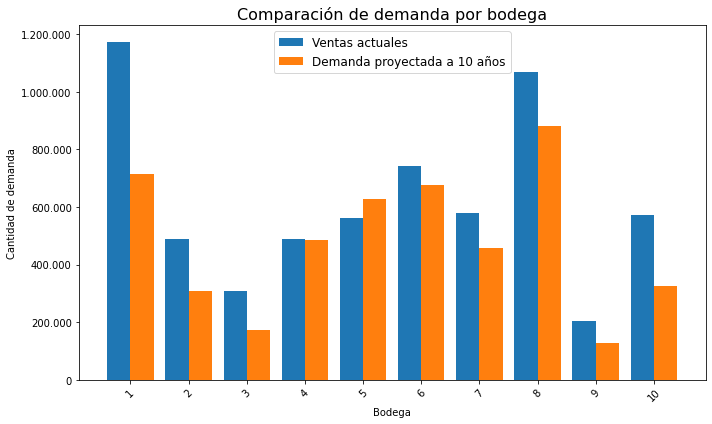

In [5]:
# Obtener las etiquetas de las bodegas
bodegas = ventas_agrupadas.index

# Obtener los valores de las ventas agrupadas y proyecciones
ventas = ventas_agrupadas.values
proyecciones = proy_10_anos_agrupadas.values

# Crear un rango de índices para las bodegas
x = range(len(bodegas))

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.bar(x, ventas, width=0.4, align='center', label='Ventas actuales')
plt.bar([i + 0.4 for i in x], proyecciones, width=0.4, align='center', label='Demanda proyectada a 10 años')
plt.xlabel('Bodega')
plt.ylabel('Cantidad de demanda')  # Cambio en la etiqueta del eje y
plt.title('Comparación de demanda por bodega', fontsize=16)  # Cambio en el título y tamaño
plt.xticks([i + 0.2 for i in x], bodegas, rotation=45)

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=12)  # Puedes ajustar el tamaño (12 en este caso) según tus preferencias

# Formatear el eje y para mostrar números con puntos como separadores de miles
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x).replace(',', '.')))

plt.tight_layout()

# Mostrar el histograma
plt.show()

### Calcular el total de demanda por comuna 

In [6]:
ventas_comuna = ventas_df.groupby('Comuna Despacho')['Cantidad'].sum()
print('-'*100)
print(f'Total de demanda por comuna:')
print(ventas_comuna)

----------------------------------------------------------------------------------------------------
Total de demanda por comuna:
Comuna Despacho
ALHUE              693.600000
ANDACOLLO         4063.566048
ANGOL            13992.261040
ANTOFAGASTA         59.895304
ANTUCO            1248.000000
                     ...     
VITACURA         75570.837024
YERBAS BUENAS    42419.918048
YUMBEL            2351.200000
YUNGAY           25212.819880
ZAPALLAR             3.200000
Name: Cantidad, Length: 228, dtype: float64


### Calcular el total de clientes asignados por bodega (Cantidades clientes por Bodega)

In [7]:
clientes_por_bodega = ventas_df.groupby('ID Bodega Despacho')['ID Cliente'].nunique()
print('-'*100)
print('Cantidad clientes por bodega:')
print(clientes_por_bodega)

----------------------------------------------------------------------------------------------------
Cantidad clientes por bodega:
ID Bodega Despacho
1     276
2     239
3     161
4     273
5     356
6     405
7     331
8     271
9     161
10    404
Name: ID Cliente, dtype: int64


### Clientes por bodega Proximos 10 años

In [8]:
clientes_por_bodega_proyeccion= proyeccion_df.groupby('ID Bodega Despacho')['ID Cliente'].nunique()
print('-'*100)
print('Cantidad clientes por bodega PROXIMOS 10 años:')
print(clientes_por_bodega_proyeccion)

----------------------------------------------------------------------------------------------------
Cantidad clientes por bodega PROXIMOS 10 años:
ID Bodega Despacho
1     223
2     191
3     125
4     216
5     283
6     309
7     262
8     220
9     125
10    317
Name: ID Cliente, dtype: int64


Comparación de Bodegas hoy y 10 años

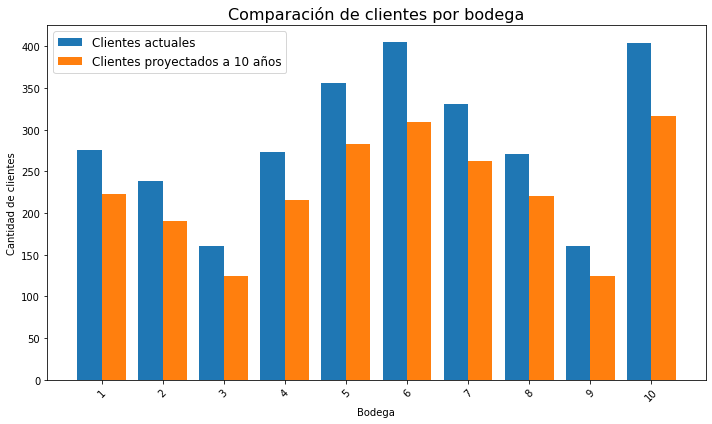

In [9]:
# Obtener las etiquetas de las bodegas
bodegas = ventas_agrupadas.index

# Obtener los valores de las ventas agrupadas y proyecciones
actuales = clientes_por_bodega.values
proyecciones = clientes_por_bodega_proyeccion.values

# Crear un rango de índices para las bodegas
x = range(len(bodegas))

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.bar(x, actuales, width=0.4, align='center', label='Clientes actuales')
plt.bar([i + 0.4 for i in x], proyecciones, width=0.4, align='center', label='Clientes proyectados a 10 años')
plt.xlabel('Bodega')
plt.ylabel('Cantidad de clientes')  # Cambio en la etiqueta del eje y
plt.title('Comparación de clientes por bodega', fontsize=16)  # Cambio en el título y tamaño
plt.xticks([i + 0.2 for i in x], bodegas, rotation=45)

# Ajustar el tamaño de la leyenda
plt.legend(fontsize=12)  # Puedes ajustar el tamaño (12 en este caso) según tus preferencias

# Formatear el eje y para mostrar números con puntos como separadores de miles
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x).replace(',', '.')))

plt.tight_layout()

# Mostrar el histograma
plt.show()

<Figure size 720x432 with 0 Axes>

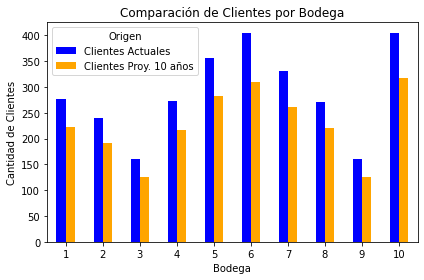

In [10]:
# Crear un DataFrame combinado
comparacion_df = pd.DataFrame({'Clientes Actuales': clientes_por_bodega, 'Clientes Proy. 10 años': clientes_por_bodega_proyeccion})

# Crear el histograma
plt.figure(figsize=(10, 6))
comparacion_df.plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparación de Clientes por Bodega')
plt.xlabel('Bodega')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Origen', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### Cantidad total por cliente

In [11]:
cantidad_total_por_cliente = ventas_df.groupby('ID Cliente')['Cantidad'].sum()
print(cantidad_total_por_cliente)

ID Cliente
1        1728.164816
2         878.660744
3       12311.242240
4       70756.899376
5         418.653512
            ...     
3123       93.600000
3124        4.000000
3125       16.000000
3126       64.000000
3127      112.800000
Name: Cantidad, Length: 2877, dtype: float64


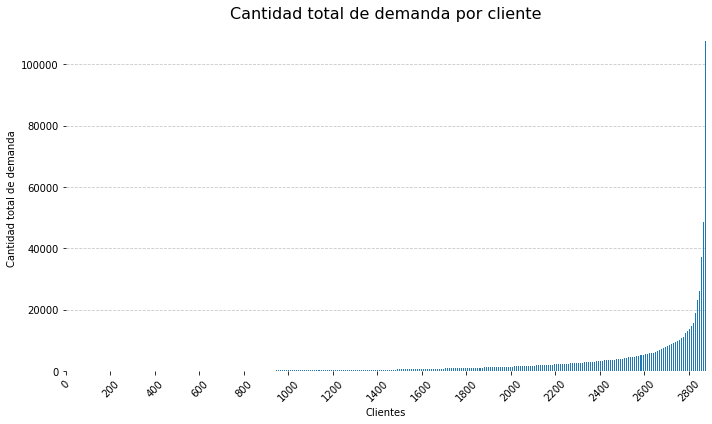

In [38]:
# Agrupar por ID de cliente y sumar la cantidad
cantidad_total_por_cliente = ventas_df.groupby('ID Cliente')['Cantidad'].sum()

# Ordenar los clientes de menor a mayor según la cantidad
cantidad_total_por_cliente = cantidad_total_por_cliente.sort_values()

# Graficar en matplotlib
plt.figure(figsize=(10, 6))
ax = cantidad_total_por_cliente.plot(kind='bar', zorder=3)  # zorder para establecer la capa de dibujo

plt.title('Cantidad total de demanda por cliente', fontsize=16)  # Título con un tamaño de fuente más grande
plt.xlabel('Clientes')
plt.ylabel('Cantidad total de demanda')

# Configuración de los ticks en el eje x cada 200 clientes
tick_spacing = 200
plt.xticks(range(0, len(cantidad_total_por_cliente), tick_spacing), range(0, len(cantidad_total_por_cliente), tick_spacing), rotation=45)

# Dibujar una cuadrícula detrás de las barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Añadir espacio a ambos lados del eje x usando plt.xlim()
plt.xlim(-0.5, len(cantidad_total_por_cliente)-0.5)

# Remover los bordes del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()

# Mostrar el gráfico
plt.show()

Visualización de Boxplot de demandas históricas por cliente 

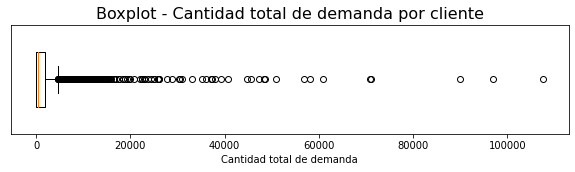

In [54]:
plt.figure(figsize=(10, 2))
plt.boxplot(cantidad_total_por_cliente.values, vert=False)  # Aumentar el valor de 'whis'
plt.title('Boxplot - Cantidad total de demanda por cliente', fontsize=16)
plt.xlabel('Cantidad total de demanda')
plt.ylabel('')
plt.yticks([])

# Ajustar la altura de la caja
box_height = box_y[3] - box_y[1]  # Altura de la caja (Q3 - Q1)
plt.ylim(box_y[1] - 0.5 * box_height, box_y[3] + 0.5 * box_height)

plt.show()

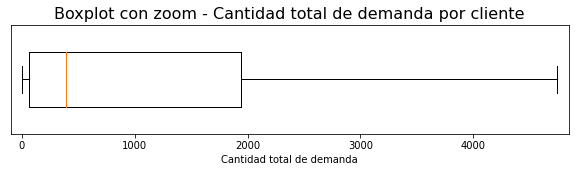

In [55]:
plt.figure(figsize=(10, 2))
boxplot = plt.boxplot(cantidad_total_por_cliente.values, vert=False, showfliers=False)
plt.title('Boxplot con zoom - Cantidad total de demanda por cliente', fontsize=16)
plt.xlabel('Cantidad total de demanda')
plt.ylabel('')
plt.yticks([])

# Obtener los valores de los bigotes
lower_whisker = boxplot['caps'][0].get_xdata()[0]  # Bigote inferior
upper_whisker = boxplot['caps'][1].get_xdata()[0]  # Bigote superior

# Agregar márgenes al rango mostrado en el eje x
margin = 100
plt.xlim(lower_whisker - margin, upper_whisker + margin)

# Ajustar la altura de la caja
box = boxplot['boxes'][0]
box_y = box.get_ydata()
box_height = box_y[3] - box_y[1]  # Altura de la caja (Q3 - Q1)
plt.ylim(box_y[1] - 0.5 * box_height, box_y[3] + 0.5 * box_height)

plt.show()

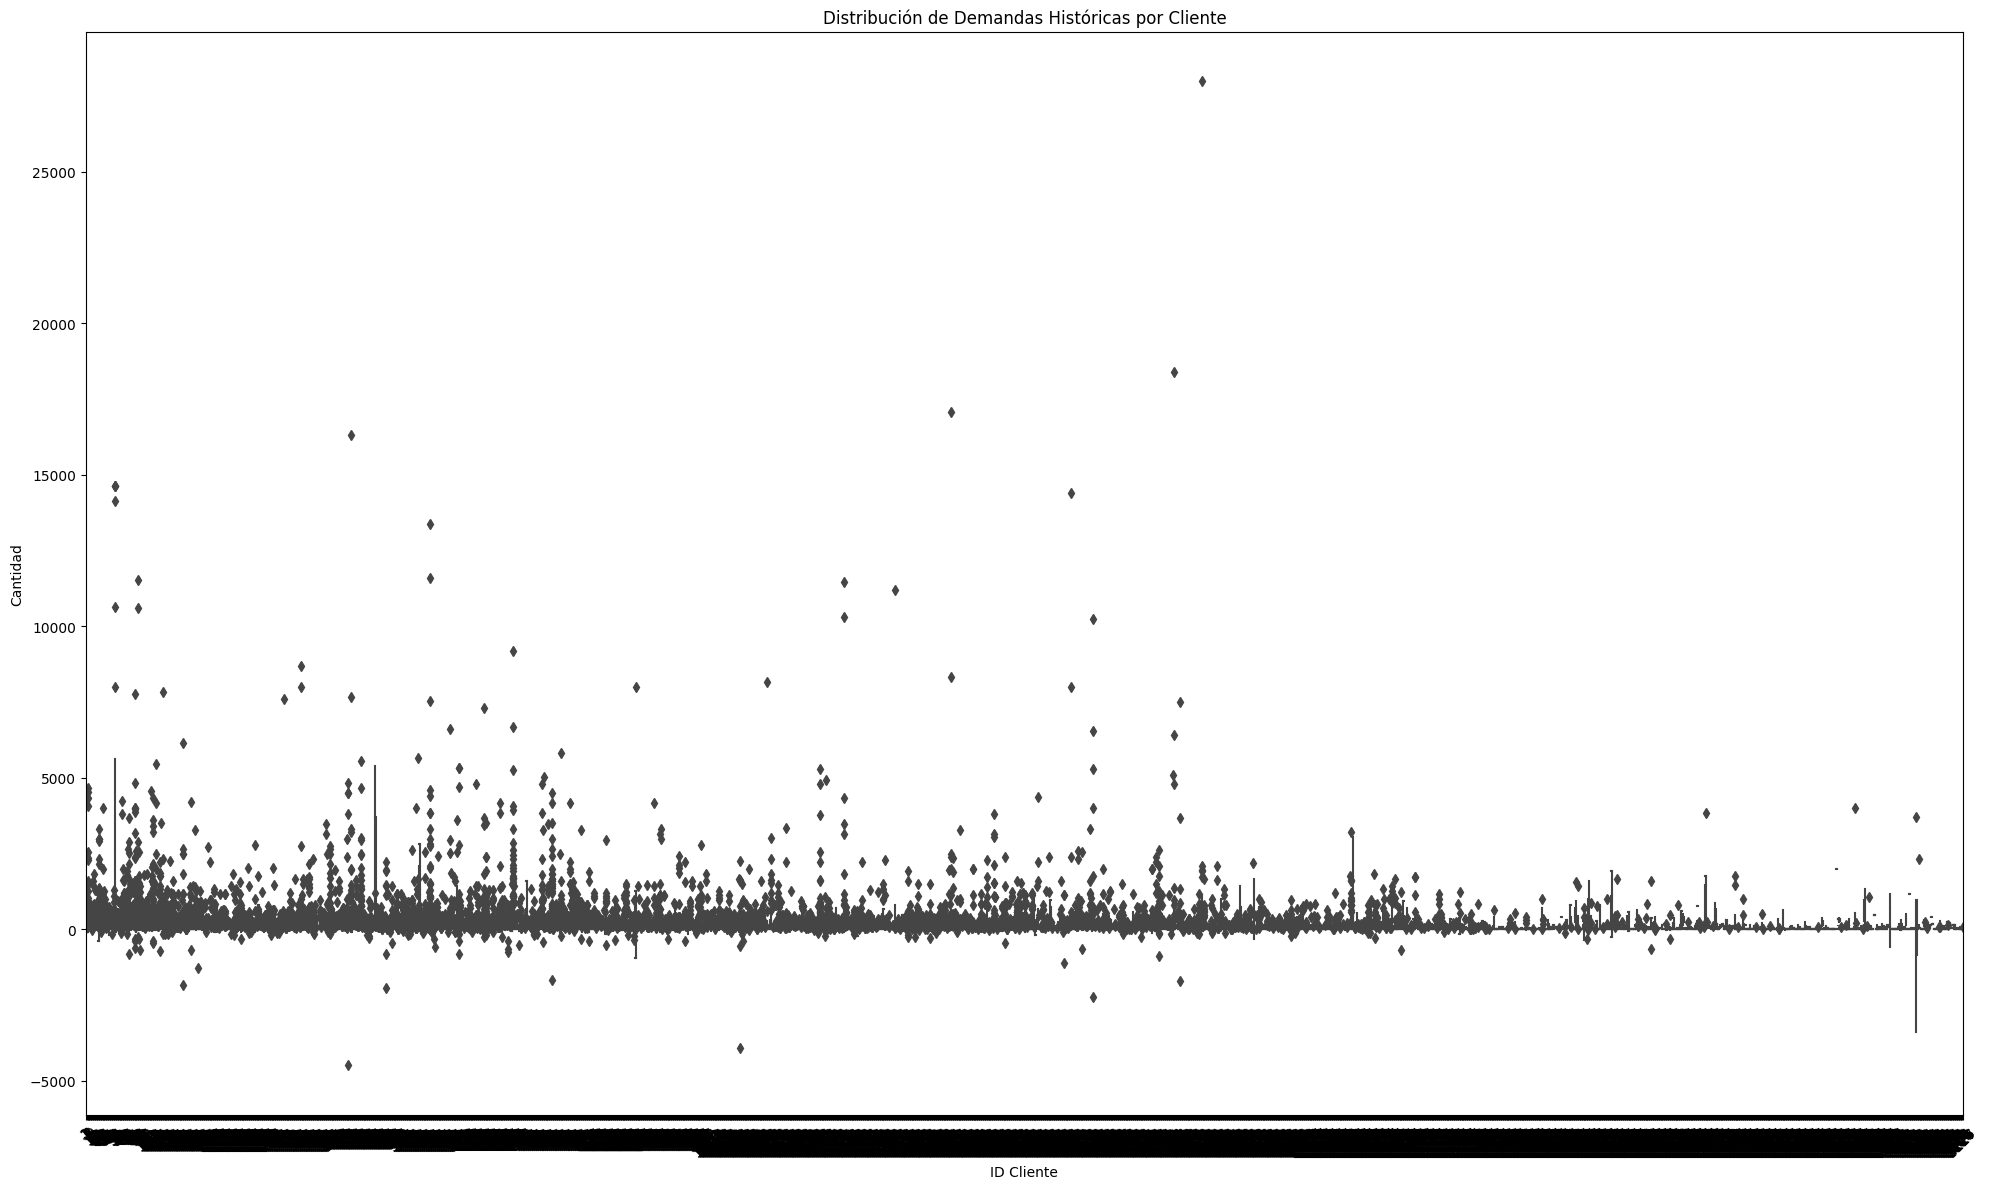

In [10]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='ID Cliente', y='Cantidad', data=ventas_df)
plt.title('Distribución de Demandas Históricas por Cliente')
plt.xlabel('ID Cliente')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

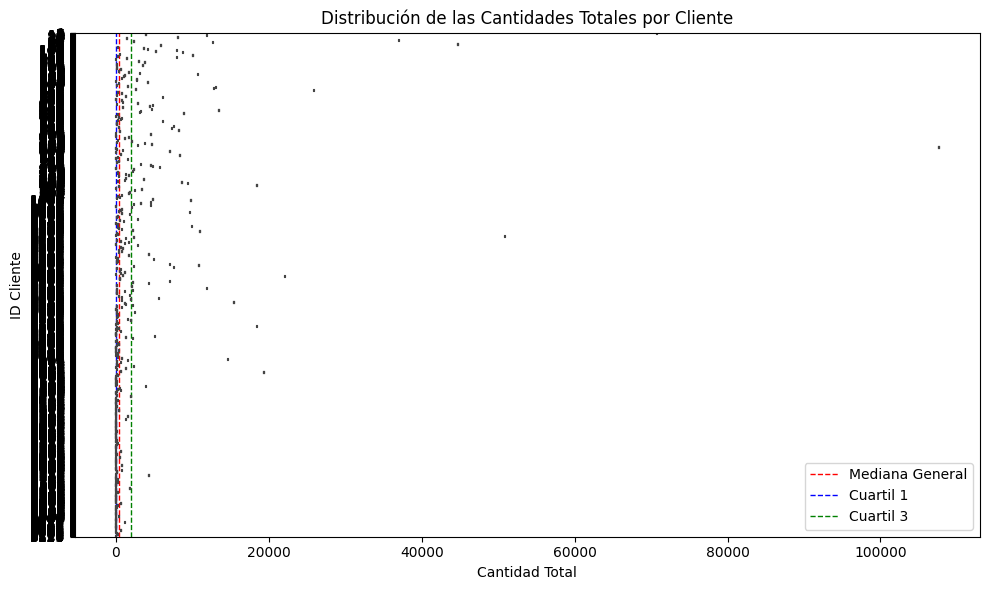

Mediana General de las Cantidades Totales: 393.509856
Cuartil 1 de las Cantidades Totales: 62.90576
Cuartil 3 de las Cantidades Totales: 1937.822856


In [11]:
# Calcular las cantidades totales por cliente
cantidades_totales = ventas_df.groupby('ID Cliente')['Cantidad'].sum()

# Calcular la mediana general de todas las cantidades totales
mediana_general = cantidades_totales.median()

# Calcular los cuartiles 1 y 3
cuartil_1 = cantidades_totales.quantile(0.25)
cuartil_3 = cantidades_totales.quantile(0.75)

# Crear el diagrama de cajas y bigotes horizontal para las cantidades totales por cliente
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=cantidades_totales.values, y=cantidades_totales.index, orient='h')
plt.axvline(mediana_general, color='r', linestyle='dashed', linewidth=1, label='Mediana General')
plt.axvline(cuartil_1, color='b', linestyle='dashed', linewidth=1, label='Cuartil 1')
plt.axvline(cuartil_3, color='g', linestyle='dashed', linewidth=1, label='Cuartil 3')
plt.title('Distribución de las Cantidades Totales por Cliente')
plt.xlabel('Cantidad Total')
plt.ylabel('ID Cliente')
plt.legend()
plt.tight_layout()

plt.show()

print("Mediana General de las Cantidades Totales:", mediana_general)
print("Cuartil 1 de las Cantidades Totales:", cuartil_1)
print("Cuartil 3 de las Cantidades Totales:", cuartil_3)

Visualizar puntos de bodegas y comunas

In [14]:
# import folium
# from folium.plugins import MarkerCluster

# # Cargar coordenadas de comunas desde el DataFrame 'COMUNAS'
# coordenadas_comunas = comunas_df.set_index('Comuna')[['LAT', 'LON']].to_dict(orient='index')

# # Crear un mapa centrado en una ubicación
# m = folium.Map(location=[-33.45, -70.65], zoom_start=10)  # Coordenadas correspondientes a Santiago, Chile

# # Agregar marcadores para las bodegas
# for index, row in bodegas_df.iterrows():
#     folium.Marker([row['LAT'], row['LONG']], popup=f'Bodega {row["ID Bodega"]}').add_to(m)

# # Crear un grupo de marcadores para la demanda de los clientes
# demand_cluster = MarkerCluster().add_to(m)

# # Agregar marcadores para la demanda de los clientes y sus coordenadas de la hoja COMUNAS
# for index, row in ventas_df.iterrows():
#     comuna = row['Comuna Despacho']
#     coordenadas = coordenadas_comunas.get(comuna)
#     if coordenadas:
#         folium.CircleMarker([coordenadas['LAT'], coordenadas['LON']],
#                             radius=row['Cantidad'] * 0.1,  # Ajusta el radio según la demanda
#                             color='blue',
#                             fill=True,
#                             fill_color='blue',
#                             fill_opacity=0.6,
#                             popup=f'Demanda: {row["Cantidad"]}').add_to(demand_cluster)

# # Guardar el mapa en un archivo HTML
# m.save('mapa_demandas.html')

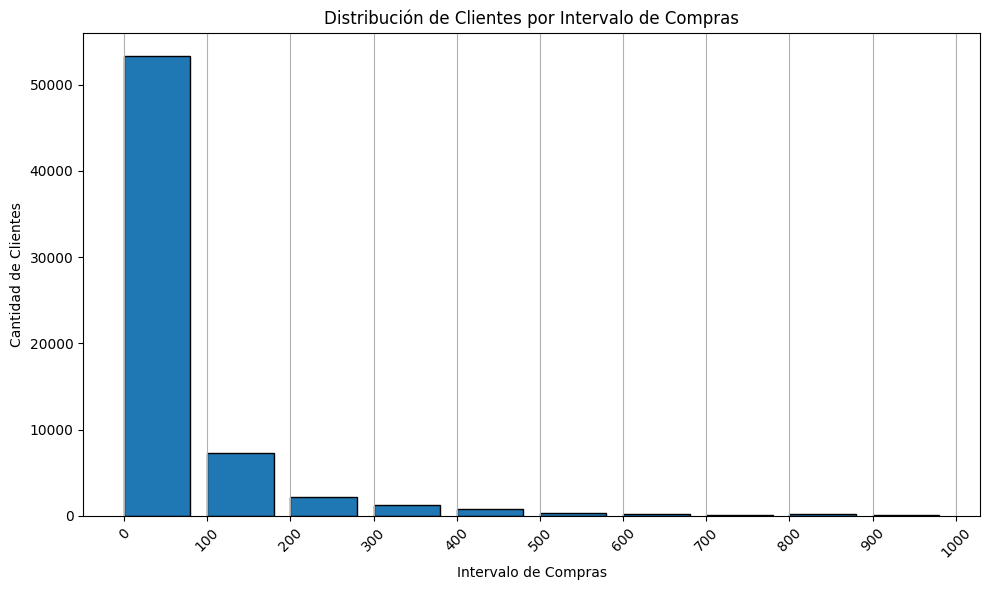

107632.720832

In [15]:
# Definir los límites de los intervalos
intervals = [i * 100 for i in range(int(cantidad_total_por_cliente.max() / 10000) + 1)]

# Calcular la cantidad de clientes en cada intervalo
clientes_por_intervalo = [((ventas_df['Cantidad'] >= intervals[i]) &
                           (ventas_df['Cantidad'] < intervals[i + 1])).sum()
                          for i in range(len(intervals) - 1)]

# # Crear el histograma
# plt.figure(figsize=(10, 6))
# plt.bar(intervals[:-1], clientes_por_intervalo, width=100)
# plt.title('Distribución de Clientes por Intervalo de Compras')
# plt.xlabel('Intervalo de Compras')
# plt.ylabel('Cantidad de Clientes')
# plt.tight_layout()

# plt.show()
# Crear el histograma con barras más delgadas
plt.figure(figsize=(10, 6))
plt.bar(intervals[:-1], clientes_por_intervalo, width=80, align='edge', edgecolor='black')
plt.title('Distribución de Clientes por Intervalo de Compras')
plt.xlabel('Intervalo de Compras')
plt.ylabel('Cantidad de Clientes')

# Configurar ticks en el eje x
plt.xticks(intervals, rotation=45)
plt.gca().xaxis.grid(True)

plt.tight_layout()
plt.show()
cantidad_total_por_cliente.max()

## REVISAR CATEGORIZACION QUE ME ESTA DANDO RARO EL HISTOGRAMA
### Categorización de clientes

In [23]:
ventas_df.drop(['Categoria'], axis=1, inplace=True)

In [27]:
# Calcular las cantidades totales por cliente
cantidades_totales = ventas_df.groupby('ID Cliente')['Cantidad'].sum()

# Calcular los cuartiles
cuartil_1 = cantidades_totales.quantile(0.25)
cuartil_3 = cantidades_totales.quantile(0.75)

# Definir función para categorizar a los clientes
def categorize_customer(total_quantity):
    if total_quantity <= cuartil_1:
        return 'Silver'
    elif cuartil_1 < total_quantity <= cuartil_3:
        return 'Gold'
    elif cuartil_3 < total_quantity:
        return 'Premium'

# Agregar columna de categoría al DataFrame
ventas_df['Categoria'] = ventas_df['ID Cliente'].map(cantidades_totales.groupby('ID Cliente').sum().apply(categorize_customer))

Histograma que indica la cantidad de clientes Silver, Gold y Premium hay POR BODEGA

<Figure size 1000x600 with 0 Axes>

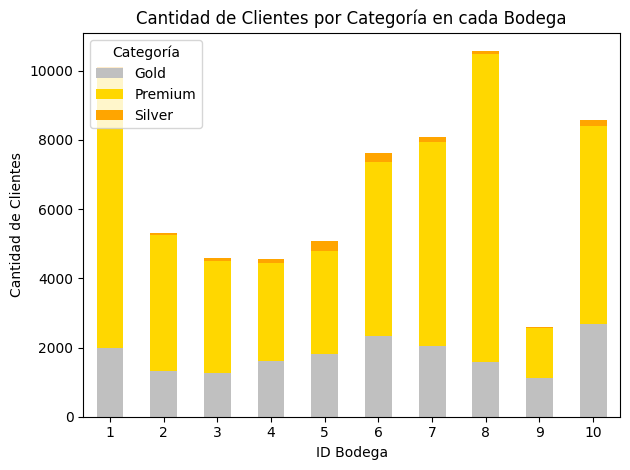

In [34]:

# Crear un DataFrame que tenga las categorías como columnas y bodegas como índice
clientes_por_bodega_categoria = ventas_df.groupby(['ID Bodega Despacho', 'Categoria'])['ID Cliente'].count().unstack()

# Rellenar con ceros los valores NaN
clientes_por_bodega_categoria = clientes_por_bodega_categoria.fillna(0).astype(int)

# Crear el histograma
plt.figure(figsize=(10, 6))
clientes_por_bodega_categoria.plot(kind='bar', stacked=True, color=['silver', 'gold', 'orange'])
plt.title('Cantidad de Clientes por Categoría en cada Bodega')
plt.xlabel('ID Bodega')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Categoría', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### Movimiento de Bodega durante los años 2017 - 2022

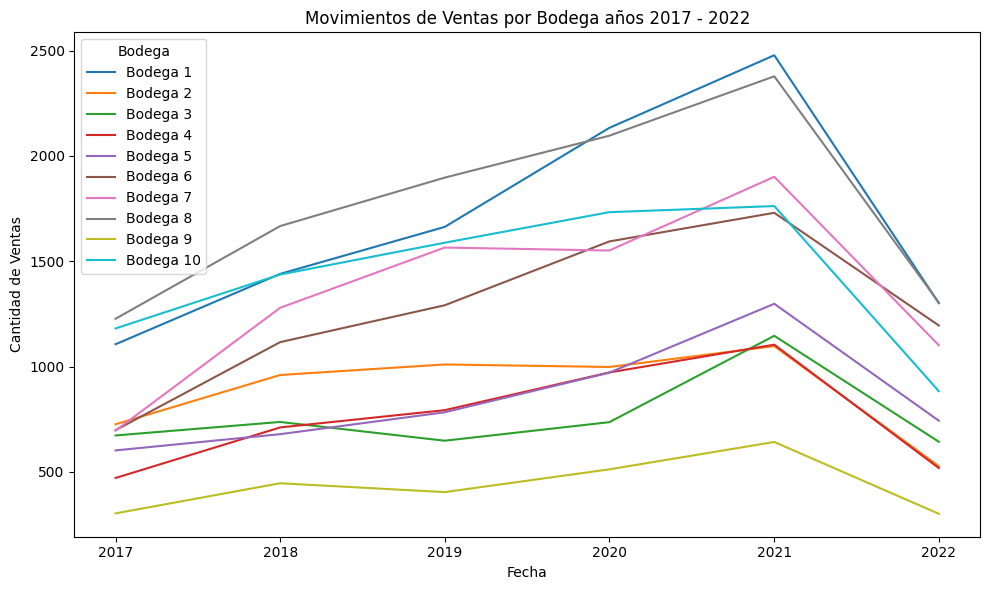

In [39]:
ventas_df['Fecha'] = pd.to_datetime(ventas_df['Fecha'])
# Crear un DataFrame que contenga las fechas, bodegas y cantidades por fecha
movimientos_bodegas = ventas_df.groupby([ventas_df['Fecha'].dt.to_period('Y'), 'ID Bodega Despacho'])['ID Cliente'].count().unstack()

# Crear el gráfico de línea para cada bodega
plt.figure(figsize=(10, 6))
for bodega in movimientos_bodegas.columns:
    plt.plot(movimientos_bodegas.index.to_timestamp(), movimientos_bodegas[bodega], label=f'Bodega {bodega}')

plt.title('Movimientos de Ventas por Bodega años 2017 - 2022')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Ventas')
plt.legend(title='Bodega')
plt.tight_layout()

plt.show()